# Fish, fish fillets, other fish meat and fish livers and roes, frozen

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Fish, fish fillets, other fish meat and fish livers and roes, frozen.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df = df[:2133]                                   # select index position 0-2133
df

,Country or Area,Year,Unit,Value,Value Footnotes
0,Albania,2003,Thousand metric tons,0.000,NaN
1,Albania,2002,Thousand metric tons,0.000,NaN
2,Albania,2001,Thousand metric tons,0.200,"1,2"
3,Albania,2000,Thousand metric tons,0.206,"1,2"
4,Albania,1999,Thousand metric tons,0.450,"1,2"
...,...,...,...,...,...
2128,Zimbabwe,1999,Thousand metric tons,1.250,"1,2"
2129,Zimbabwe,1998,Thousand metric tons,1.600,"1,2"
2130,Zimbabwe,1997,Thousand metric tons,1.800,"1,2"
2131,Zimbabwe,1996,Thousand metric tons,1.600,"1,2"


In [5]:
df.shape

(2133, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  2133 non-null   object 
 1   Year             2133 non-null   object 
 2   Unit             2133 non-null   object 
 3   Value            2133 non-null   float64
 4   Value Footnotes  784 non-null    object 
dtypes: float64(1), object(4)
memory usage: 83.4+ KB


In [7]:
df.rename(
    columns={
        'Country or Area': 'Country_or_Area'}, inplace=True) 
df.head() 

,Country_or_Area,Year,Unit,Value,Value Footnotes
0,Albania,2003,Thousand metric tons,0.000,NaN
1,Albania,2002,Thousand metric tons,0.000,NaN
2,Albania,2001,Thousand metric tons,0.200,"1,2"
3,Albania,2000,Thousand metric tons,0.206,"1,2"
4,Albania,1999,Thousand metric tons,0.450,"1,2"


In [8]:
df1 = df[['Country_or_Area', 'Year', 'Unit', 'Value']]
df1.head()

,Country_or_Area,Year,Unit,Value
0,Albania,2003,Thousand metric tons,0.000
1,Albania,2002,Thousand metric tons,0.000
2,Albania,2001,Thousand metric tons,0.200
3,Albania,2000,Thousand metric tons,0.206
4,Albania,1999,Thousand metric tons,0.450


In [9]:
df1[['Country_or_Area', 'Unit']].describe()

,Country_or_Area,Unit
count,2133,2133
unique,168,2
top,Mexico,Thousand metric tons
freq,44,1660


In [10]:
df1['Unit'] = df1['Unit'].apply(lambda x: str.strip(x))                             # strip white spaces

In [11]:
df1['Country_or_Area'].value_counts()

Mexico        44
Portugal      44
Denmark       44
Sweden        43
Lithuania     42
              ..
Montenegro     2
Austria        1
Niger          1
Mozambique     1
Israel         1
Name: Country_or_Area, Length: 168, dtype: int64

In [12]:
df1['Value'].describe()

count    2133.000000
mean      174.956787
std       580.866011
min         0.000000
25%         1.727000
50%        15.465000
75%        68.395841
max      5675.672000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

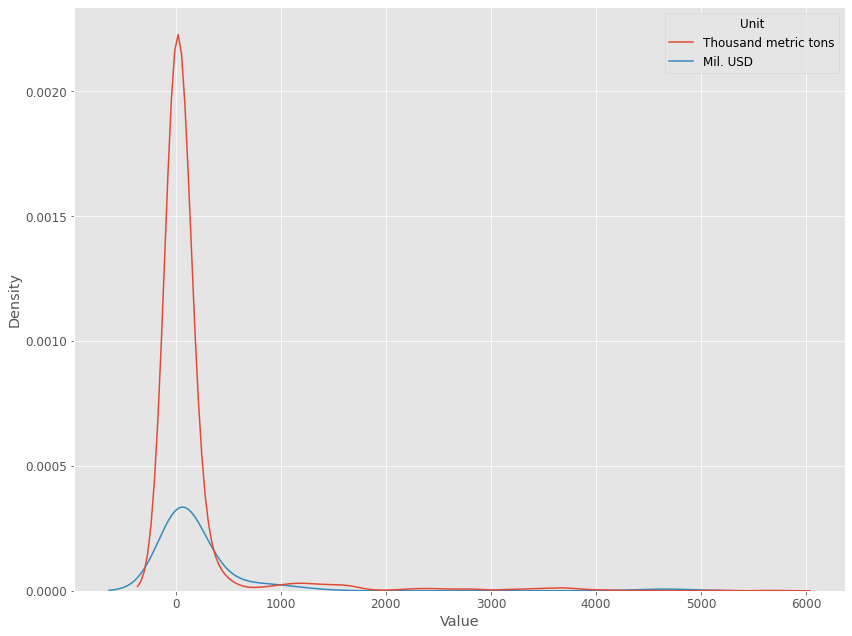

In [13]:
sns.kdeplot(data=df1, x='Value', hue='Unit')

# Missing Values Exploration

In [14]:
df1.isna().sum()

Country_or_Area    0
Year               0
Unit               0
Value              0
dtype: int64

# Grouping and Aggregation

In [15]:
country_area_unit_grpd = df1.groupby(['Country_or_Area', 'Unit'])                           # group by country/area and unit
country_area_unit_grpd.head()

,Country_or_Area,Year,Unit,Value
0,Albania,2003,Thousand metric tons,0.000
1,Albania,2002,Thousand metric tons,0.000
2,Albania,2001,Thousand metric tons,0.200
3,Albania,2000,Thousand metric tons,0.206
4,Albania,1999,Thousand metric tons,0.450
...,...,...,...,...
2124,Zimbabwe,2003,Thousand metric tons,1.300
2125,Zimbabwe,2002,Thousand metric tons,1.300
2126,Zimbabwe,2001,Thousand metric tons,1.300
2127,Zimbabwe,2000,Thousand metric tons,1.300


# Data Visualization

In [16]:
from matplotlib.ticker import FuncFormatter

# x-axis formatter helper functions
def million(x, pos):
    return '%1.1fM' % (x * 1)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1)

format_tsd = FuncFormatter(thousand)


# horizontal bar helper function
def plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # create horizontal bar plot
    ax.barh(
        y=y, width=width, 
        align=align, 
        color=color, edgecolor=edgecolor, linewidth=linewidth)

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # despine axes
    sns.despine(bottom=True, left=True)

    # set x-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_hbar

# Metrics Tons Exploration

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

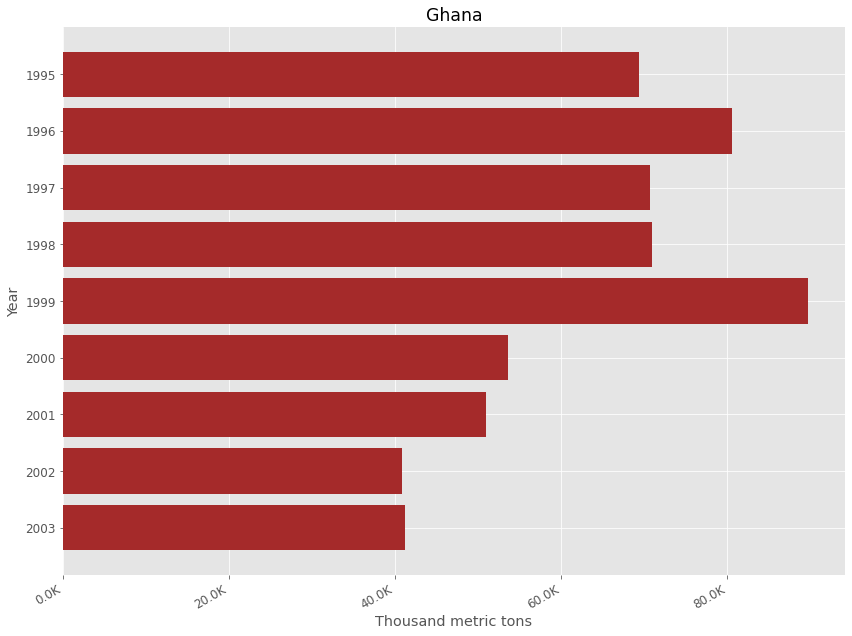

In [17]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('Ghana', 'Thousand metric tons'))['Year'], width=country_area_unit_grpd.get_group(('Ghana', 'Thousand metric tons'))['Value'],
    align='center',
    color='brown',
    title='Ghana', xlabel='Thousand metric tons', ylabel='Year',
    formatter=format_tsd 
)

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

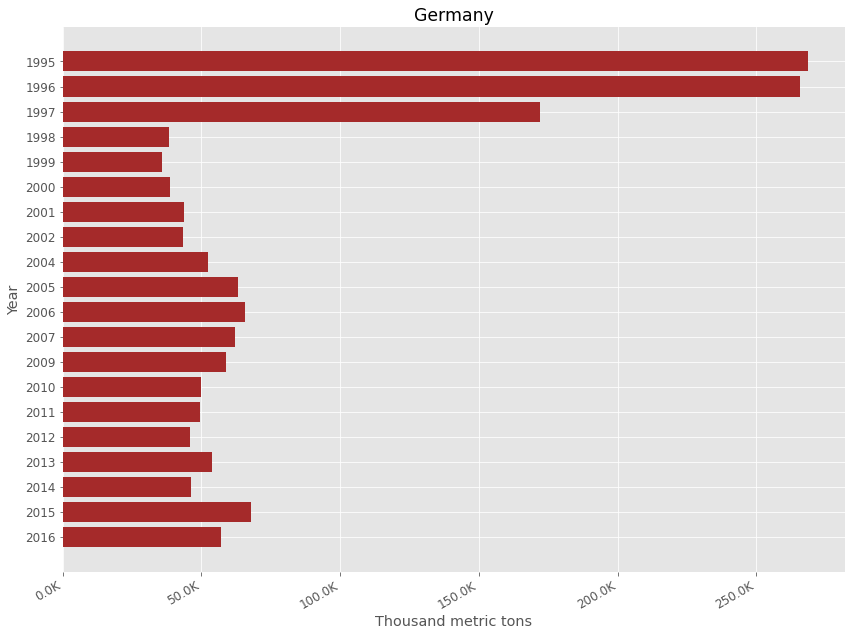

In [18]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('Germany', 'Thousand metric tons'))['Year'], width=country_area_unit_grpd.get_group(('Germany', 'Thousand metric tons'))['Value'],
    align='center',
    color='brown',
    title='Germany', xlabel='Thousand metric tons', ylabel='Year',
    formatter=format_tsd 
)

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

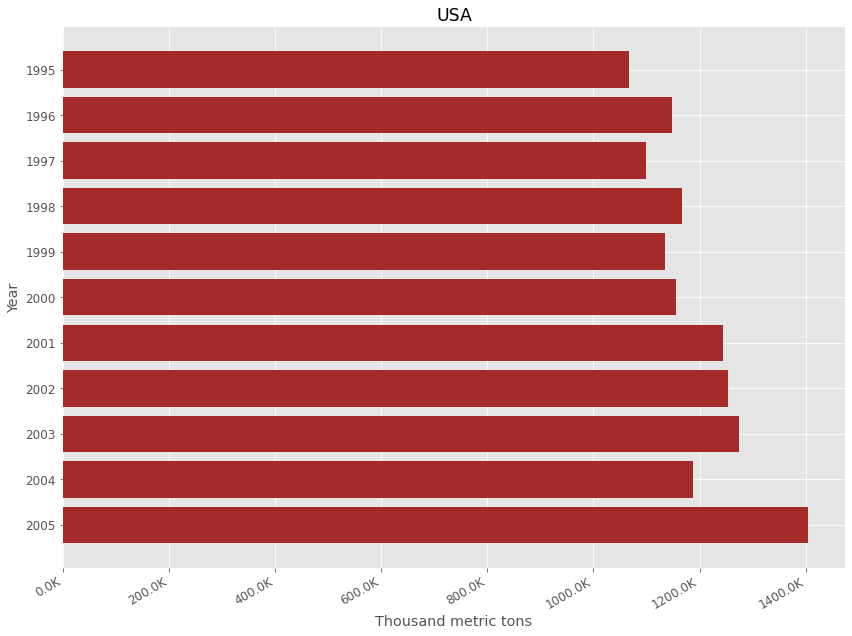

In [19]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('United States of America', 'Thousand metric tons'))['Year'], width=country_area_unit_grpd.get_group(('United States of America', 'Thousand metric tons'))['Value'],
    align='center',
    color='brown',
    title='USA', xlabel='Thousand metric tons', ylabel='Year',
    formatter=format_tsd
)

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

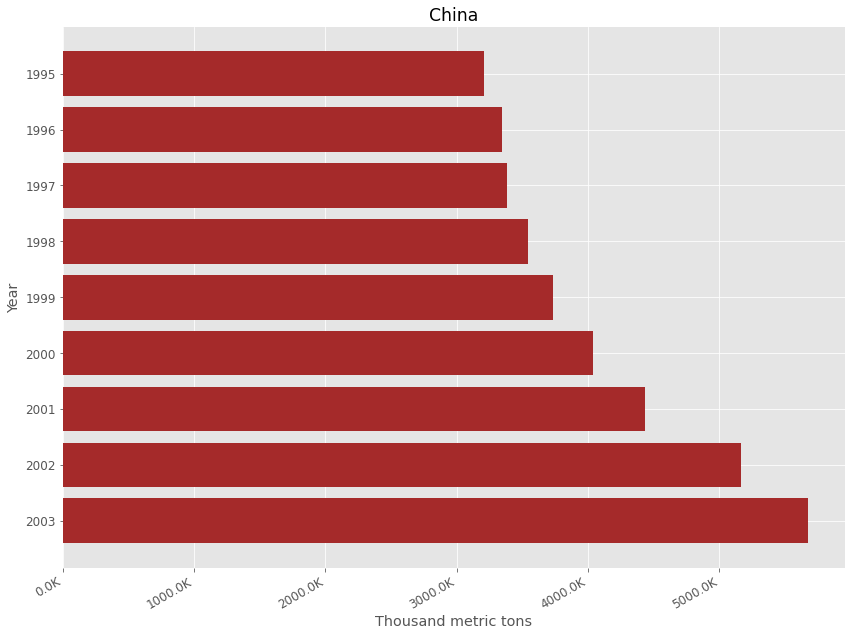

In [20]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('China', 'Thousand metric tons'))['Year'], width=country_area_unit_grpd.get_group(('China', 'Thousand metric tons'))['Value'],
    align='center',
    color='brown',
    title='China', xlabel='Thousand metric tons', ylabel='Year',
    formatter=format_tsd
)

# Mil. USD EXploration

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

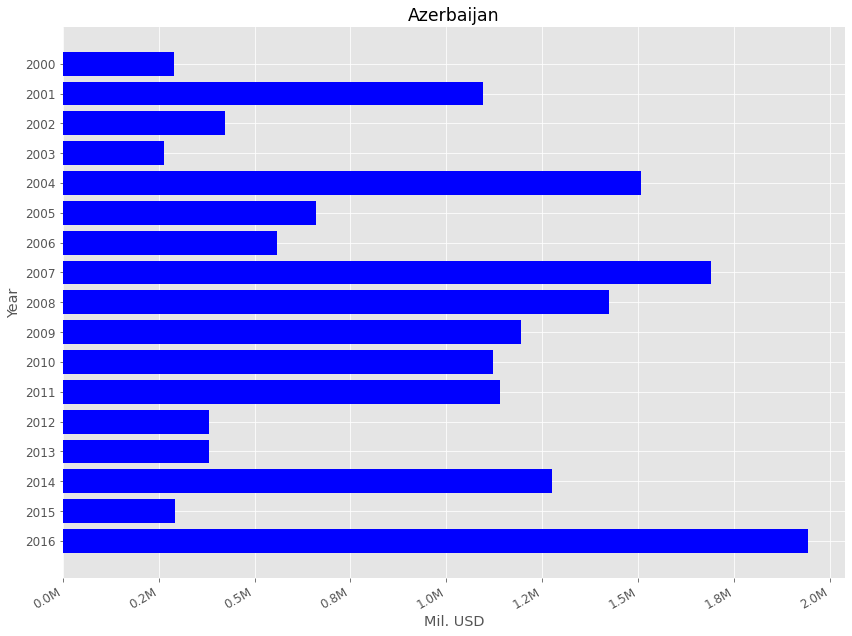

In [21]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('Azerbaijan', 'Mil. USD'))['Year'], width=country_area_unit_grpd.get_group(('Azerbaijan', 'Mil. USD'))['Value'],
    align='center',
    color='blue',
    title='Azerbaijan', xlabel='Mil. USD', ylabel='Year',
    formatter=format_mill
)

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

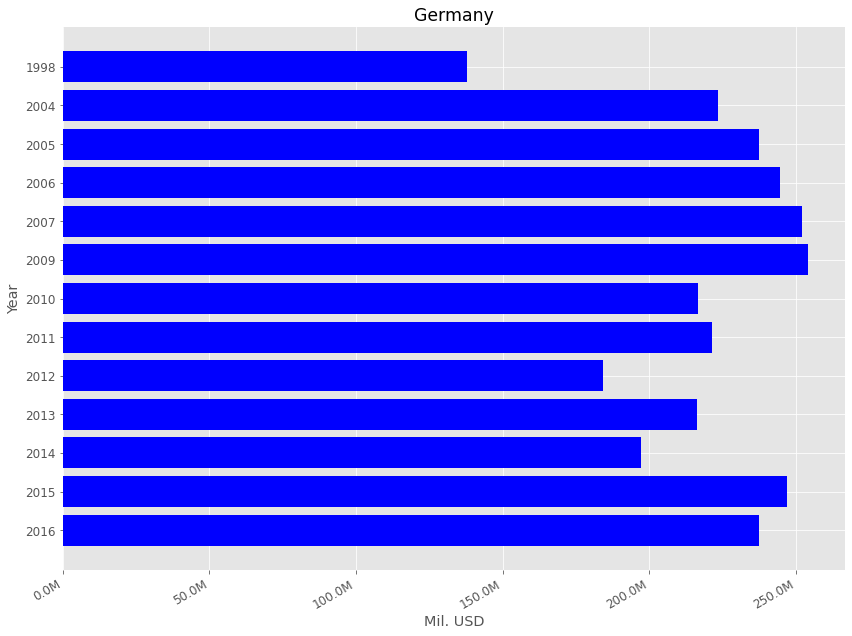

In [22]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('Germany', 'Mil. USD'))['Year'], width=country_area_unit_grpd.get_group(('Germany', 'Mil. USD'))['Value'],
    align='center',
    color='blue',
    title='Germany', xlabel='Mil. USD', ylabel='Year',
    formatter=format_mill
)

<function __main__.plot_hbar(y, width, align=None, color=None, edgecolor=None, linewidth=None, title=None, xlabel=None, ylabel=None, formatter=None)>

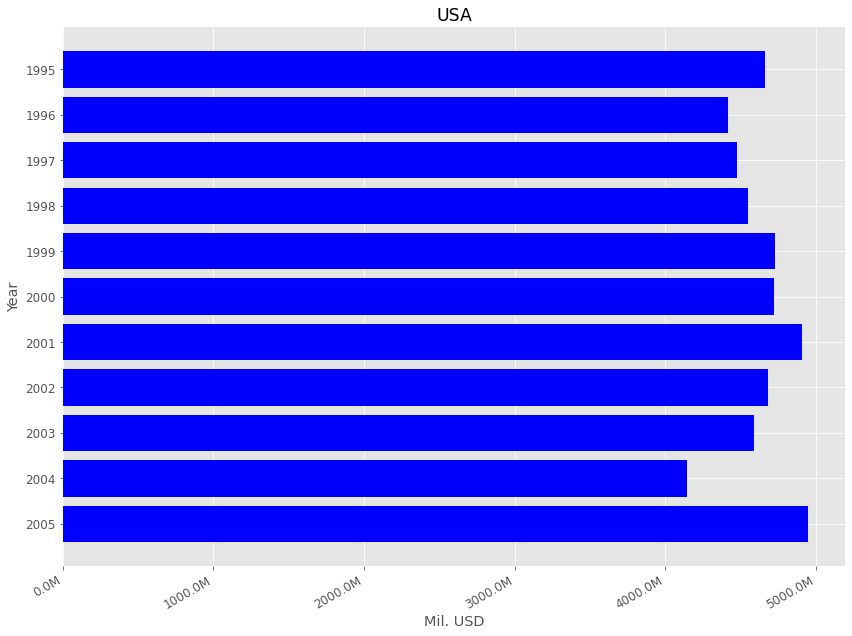

In [23]:
plot_hbar(
    y=country_area_unit_grpd.get_group(('United States of America', 'Mil. USD'))['Year'], width=country_area_unit_grpd.get_group(('United States of America', 'Mil. USD'))['Value'],
    align='center',
    color='blue',
    title='USA', xlabel='Mil. USD', ylabel='Year',
    formatter=format_mill
)